In [528]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# COL1 = 2020 USA's daily Cases
# COL21 =month;     COL22 = top10 countries
# COL3 = 2020 USA's death

In [529]:
df=pd.read_csv('covid.csv')
df.head(5)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.0
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.0
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.0
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.0
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.0


I combine Date.Day, Date.Month, Date.Year into new column **Date (ex: 2019/12/31)**

In [530]:
df1 = df.copy()  
df['Date.Year']= df1['Date.Year'].astype(str)  
df['Date.Month']= df1['Date.Month'].astype(str)  
df['Date.Day']= df1['Date.Day'].astype(str)  
df.insert(3, column="Date", value=(df['Date.Year']+'/'+df['Date.Month']+'/'+df['Date.Day']))
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [531]:
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


# I choose only **USA(df3)** to do analysis

In [532]:
df3=df.loc[df['Location.Country']=='United_States_of_America']
df3

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,2019/12/31,0,0,United_States_of_America,USA,329064917,America,0.000000
132,1,1,2020,2020/1/1,0,0,United_States_of_America,USA,329064917,America,0.000000
199,2,1,2020,2020/1/2,0,0,United_States_of_America,USA,329064917,America,0.000000
266,3,1,2020,2020/1/3,0,0,United_States_of_America,USA,329064917,America,0.000000
333,4,1,2020,2020/1/4,0,0,United_States_of_America,USA,329064917,America,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
52732,1,11,2020,2020/11/1,78934,848,United_States_of_America,USA,329064917,America,309.850412
52944,2,11,2020,2020/11/2,81001,440,United_States_of_America,USA,329064917,America,319.926843
53156,3,11,2020,2020/11/3,83883,555,United_States_of_America,USA,329064917,America,327.136059
53368,4,11,2020,2020/11/4,92734,1076,United_States_of_America,USA,329064917,America,337.524586


It's my first time to complet **my Date column**, so I decide to draw my own picture!!!!

Text(0.5, 1.0, '2021 USA daily patients curve')

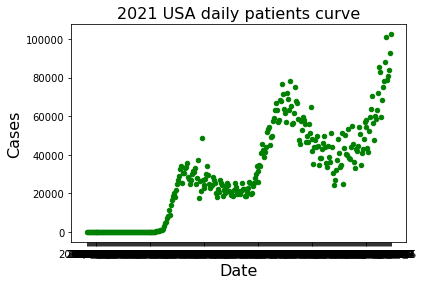

In [533]:
date=df3.plot.scatter(x='Date', y='Data.Cases',color='green')
date.set_xlabel('Date',fontsize=16)
date.set_ylabel('Cases',fontsize=16)
date.set_title('2021 USA daily patients curve',fontsize=16)

# Calculate USA ***mean***, ***median***, ***mode*** 

**Mean**

In [534]:
COL1_Mean=round(df3['Data.Cases'].mean(),2)
COL1_Mean

30503.17

**Median**

In [535]:
COL1_Median=round(df3['Data.Cases'].median(),2)
COL1_Median

27762.0

**Mode**

In [536]:
COL1_Mode=round(df3['Data.Cases'].mode(),2)
COL1_Mode

0    0
dtype: int64

Calculate USA trimmed_mean, and the ***n= 10% = 0.1*** because the pandemic happened in USA after 2022.Feb.

**But I prefer only cut the top but keep the bottom**

In [537]:
COL1_trim_mean=round(trim_mean(df3['Data.Cases'],0.1),2)
COL1_trim_mean

28757.84

In [538]:
casesrange = pd.cut(df['Data.Cases'], 100)
print(casesrange.value_counts())

(-507.24, 600.44]        45462
(600.44, 1708.12]         4234
(1708.12, 2815.8]         1176
(2815.8, 3923.48]          620
(3923.48, 5031.16]         451
                         ...  
(-3830.28, -2722.6]          0
(-4937.96, -3830.28]         0
(98076.28, 99183.96]         0
(99183.96, 100291.64]        0
(-6045.64, -4937.96]         0
Name: Data.Cases, Length: 100, dtype: int64


sort of Data cases ASEC

In [539]:
df4 = pd.concat([df, casesrange], axis=1)
df4 = df3.sort_values(by='Data.Cases')
df4

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,2019/12/31,0,0,United_States_of_America,USA,329064917,America,0.000000
1665,24,1,2020,2020/1/24,0,0,United_States_of_America,USA,329064917,America,0.000304
3876,26,2,2020,2020/2/26,0,0,United_States_of_America,USA,329064917,America,0.012156
1799,26,1,2020,2020/1/26,0,0,United_States_of_America,USA,329064917,America,0.000608
3742,24,2,2020,2020/2/24,0,0,United_States_of_America,USA,329064917,America,0.006990
...,...,...,...,...,...,...,...,...,...,...,...
51040,24,10,2020,2020/10/24,85329,953,United_States_of_America,USA,329064917,America,251.923848
52308,30,10,2020,2020/10/30,88130,968,United_States_of_America,USA,329064917,America,293.640844
53368,4,11,2020,2020/11/4,92734,1076,United_States_of_America,USA,329064917,America,337.524586
52520,31,10,2020,2020/10/31,101273,1040,United_States_of_America,USA,329064917,America,303.066644


# COL1 Histogram

**Mode <median < trimmed mean < mean**

It represents a right-skewed distribution, which has a peak to the left of the distribution and data values that taper off to the right. This distribution has a single peak and is also unimodal. For a histogram that is skewed to the right, the mean is located to the right on the distribution and is the largest value of the measures of central tendency. The mean has the largest value because it is strongly affected by the outliers on the right tail that pull the mean to the right. The mode is the smallest value, and it is located to the left on the distribution. The mode always occurs at the highest point of the peak. The median is located between the mode and the mean.

In [540]:
# How to mark more beautiful? Need more time to review it.

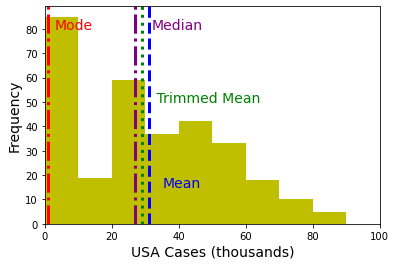

In [541]:
ax = (df3['Data.Cases'] / 1000).plot.hist(xlim=[0, 100], 
                                    bins=range(0,100,10), figsize=(6, 4), color='y')
ax.set_xlabel('USA Cases (thousands)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
plt.text(3,80,'Mode',fontsize=14, color='red')
plt.text(32,80,'Median',fontsize=14, color='purple')
plt.text(32,50,' Trimmed Mean',fontsize=14, color='green')
plt.text(35,15,'Mean',fontsize=14, color='blue')
ax.axvline(1,color='r',linestyle='dashdot', lw=3)
ax.axvline(27,color='purple',linestyle='dashdot', lw=3)
ax.axvline(29,color='green',linestyle='dotted', lw=3)
ax.axvline(31,color='blue',linestyle='--', lw=3)

In [542]:
print(np.average(df3['Data.Cases'], weights=df3['Data.Cases']))

49773.70571547779


# mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)

**mean abolute deviation**

In [543]:
print(robust.scale.mad(df3['Data.Cases']))
print(abs(df3['Data.Cases'] - df3['Data.Cases'].median()).median() / 0.6744897501960817)

31625.387922942995
31625.387922942995


**standard deviation**

In [544]:
df3['Data.Cases'].std()

24283.916309543823

**interquartile range**

In [545]:
df3['Data.Cases'].quantile(0.75)-df3['Data.Cases'].quantile(0.25)

46625.5

**Box example 1**

In [546]:
a=df3['Data.Cases'].quantile(0.75)
b=df3['Data.Cases'].quantile(0.25)
c=df3['Data.Cases'].quantile(0.50)
c


27762.0

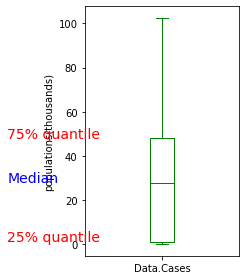

In [547]:
ax=(df3['Data.Cases']/1000).plot.box(figsize=(4,4),color='green')
ax.set_ylabel('populations(thousands)')

plt.text(0,48,'75% quantile',fontsize=14, color='red')
plt.text(0,1.5,'25% quantile',fontsize=14, color='red')
plt.text(0,28,'Median',fontsize=14, color='Blue')

plt.tight_layout()
plt.show()

**Box example 2**

Text(0, 0.5, 'Populations(thousands)')

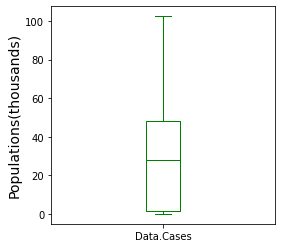

In [548]:
ax=(df3['Data.Cases']/1000).plot(kind='box',figsize=(4,4), color='green')
ax.set_ylabel('Populations(thousands)',fontsize=14)

I need to rollback 'Date.Month' to int from str, because I want to arrange **the month**

In [549]:
df4=df3.drop(65)
df5=df4.copy()
df4['Date.Month']=df5['Date.Month'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 132 to 53579
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date.Day            310 non-null    object 
 1   Date.Month          310 non-null    int32  
 2   Date.Year           310 non-null    object 
 3   Date                310 non-null    object 
 4   Data.Cases          310 non-null    int64  
 5   Data.Deaths         310 non-null    int64  
 6   Location.Country    310 non-null    object 
 7   Location.Code       310 non-null    object 
 8   Data.Population     310 non-null    int64  
 9   Location.Continent  310 non-null    object 
 10  Data.Rate           310 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 27.9+ KB


So, I got the COL21 ***categorical values*** = **'Date.Month'**

In [550]:
df4=df4.groupby('Date.Month').sum()
df4

,Data.Cases,Data.Deaths,Data.Population,Data.Rate
Date.Month,,,,
1,6,0,10201012427,0.010332
2,60,0,9542882593,0.137663
3,164554,3170,10201012427,275.032662
4,875289,57796,9871947510,3380.417792
5,730475,42815,10201012427,3274.059446
6,820168,22359,9871947510,3047.026432
7,1904462,25930,10201012427,7332.467776
8,1502149,30999,10201012427,7033.964061
9,1193898,22929,9871947510,5083.610296


**''Bar plot''** COL21 **categorical values** V.S variable(Death) I choose directly

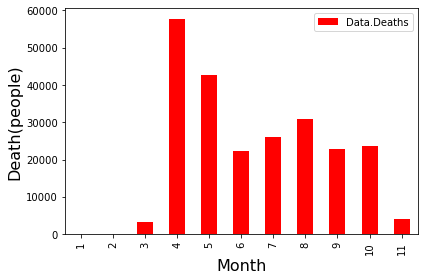

In [551]:
amdeath=df4.plot.bar(y='Data.Deaths', figsize=(6,4),legend=True, color='red')
amdeath.set_xlabel('Month',fontsize=16)
amdeath.set_ylabel('Death(people)',fontsize=16)
amcases.set_title('2021 USA monthly COVID death distribution',fontsize=16)

plt.tight_layout()
plt.show()

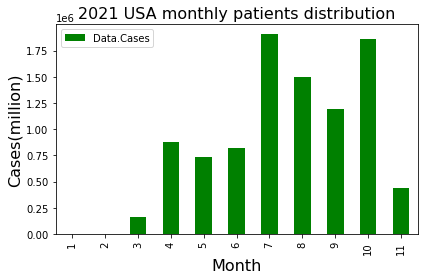

In [552]:
amcases=df4.plot(kind='bar', y='Data.Cases', figsize=(6,4),legend=True, color='Green')
amcases.set_xlabel('Month',fontsize=16)
amcases.set_ylabel('Cases(million)',fontsize=16)
amcases.set_title('2021 USA monthly patients distribution',fontsize=16)

plt.tight_layout()
plt.show()

Also, I chose **COL22 = top10 countries** top draw **box plot**

In [725]:
df8=df.loc[df['Date.Year']==2020]
df8check=df8.pivot_table(values = 'Data.Cases', index='Location.Country',
                                aggfunc='sum', margins=True)
df8final=df8check.sort_values(by='Data.Cases')
df8final.tail(10)

,Data.Cases
Location.Country,
United_Kingdom,1099059
Colombia,1108084
Argentina,1205915
Spain,1284408
France,1543321
Russia,1693454
Brazil,5590025
India,8364086
United_States_of_America,9486486


In [726]:
df8

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
67,1,1,2020,0,0,Afghanistan,AFG,38041757,Asia,0.000000
68,1,1,2020,0,0,Algeria,DZA,43053054,Africa,0.000000
69,1,1,2020,0,0,Armenia,ARM,2957728,Europe,0.000000
70,1,1,2020,0,0,Australia,AUS,25203200,Oceania,0.000000
71,1,1,2020,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [752]:
df9=df8.loc[(df8['Location.Country']=='United_Kingdom') | (df8['Location.Country']=='Colombia')|
             (df8['Location.Country']=='Argentina') |(df8['Location.Country']=='Spain')|
              (df8['Location.Country']=='France') |(df8['Location.Country']=='Russia')|
             (df8['Location.Country']=='Brazil') |(df8['Location.Country']=='India')|
             (df8['Location.Country']=='United_States_of_America')]
df9

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
76,1,1,2020,0,0,Brazil,BRA,211049519,America,0.000000
89,1,1,2020,0,0,France,FRA,67012883,Europe,0.000000
94,1,1,2020,0,0,India,IND,1366417756,Asia,0.000000
120,1,1,2020,0,0,Russia,RUS,145872260,Europe,0.000000
124,1,1,2020,0,0,Spain,ESP,46937060,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...
53448,5,11,2020,40558,385,France,FRA,67012883,Europe,874.309497
53470,5,11,2020,50210,704,India,IND,1366417756,Asia,48.092174
53538,5,11,2020,19768,389,Russia,RUS,145872260,Europe,168.722278
53577,5,11,2020,25177,492,United_Kingdom,GBR,66647112,Europe,464.881359


In [737]:
df12=df9.groupby('Location.Code').sum()
df12

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
Location.Code,,,,,,,
ARG,3857,1630,492880,1205915,32520,10926484700,35437.029478
BRA,4821,1737,626200,5590025,161106,65425350890,36281.740117
COL,3828,1618,484800,1108084,32013,12081466320,29174.855988
ESP,4816,1726,624180,1284408,38118,14503551540,34126.180890
FRA,4821,1737,626200,1543321,38674,20773993730,26517.344433
GBR,4821,1737,626200,1099059,47742,20660604720,20034.294960
IND,4812,1734,624180,8364086,124315,422223086604,8263.407549
RUS,4821,1737,626200,1693454,29217,45220400600,15120.567817
USA,4821,1737,626200,9486486,233729,102010124270,37970.050148


COL22: top 10 countries V.S COL1 cases plot

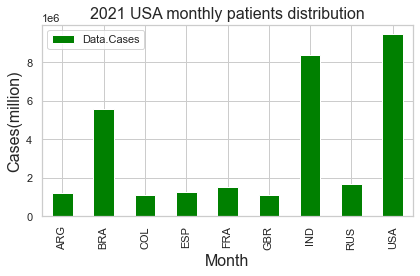

In [738]:
amccountry=df12.plot(kind='bar', y='Data.Cases', figsize=(6,4),legend=True, color='Green')
amccountry.set_xlabel('Month',fontsize=16)
amccountry.set_ylabel('Cases(million)',fontsize=16)
amccountry.set_title('2021 top 10 countries patients distribution',fontsize=16)

plt.tight_layout()
plt.show()

In [553]:
# How to draw a trendline and mark intercept x,y and intercept?? Need more time to review.

**Scatter plot**: The death rate and the daily cases have an obvious correlation and with more COVID patients, more people will die. However, around **April 2020**, compared to the following cases, there are fewer cases, but there have high deaths. We all knew at the first moment, the hospital did not ready, maybe it's a reason that had high death count in the USA.

The highest death in 2020 USA is on **April, 2020**

In [554]:
df3[df3['Data.Deaths']>=3000]

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
11173,16,4,2020,2020/4/16,30148,4928,United_States_of_America,USA,329064917,America,128.528743
11583,18,4,2020,2020/4/18,30833,3770,United_States_of_America,USA,329064917,America,128.910430
12813,24,4,2020,2020/4/24,26543,3179,United_States_of_America,USA,329064917,America,122.510477


**2020 USA cases V.S death scatter plot**

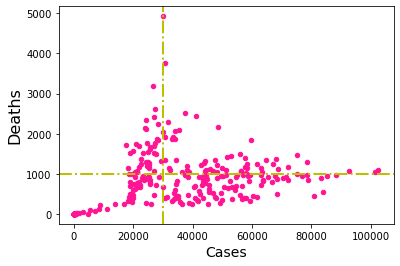

In [555]:
ascatter=df3.plot.scatter(x='Data.Cases', y='Data.Deaths', figsize=(6,4),legend=True, color='deeppink')
ascatter.set_xlabel('Cases', fontsize=14)
ascatter.set_ylabel('Deaths', fontsize=16)
ascatter.axhline(1000,color='y',linestyle='dashdot', lw=2)
ascatter.axvline(30000,color='y',linestyle='dashdot', lw=2)
ax.legend(['COVID patients'])

In [ ]:
After the first curve, the following 

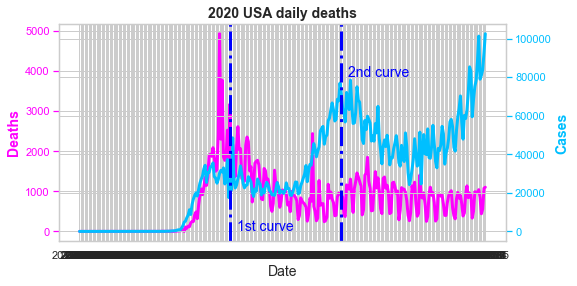

In [747]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
ax1.set_title('2020 USA daily deaths',fontsize=14,fontweight='bold')
ax1.plot(df3['Date'], df3['Data.Deaths'],color='fuchsia',linewidth=3)
ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Deaths',fontsize=14,color='fuchsia',fontweight='bold')
ax1.tick_params(axis='y', colors='fuchsia') 
ax2.plot(df3['Date'], df3['Data.Cases'],color='deepskyblue',linewidth=3)
ax2.set_ylabel('Cases',fontsize=14,color='deepskyblue',fontweight='bold')
ax2.tick_params(axis='y', colors='deepskyblue') 
plt.text(120,500,'1st curve',fontsize=14, color='blue')
ax2.axvline(115,color='blue',linestyle='dashdot', lw=3)
plt.text(205,80000,'2nd curve',fontsize=14, color='blue')
ax2.axvline(200,color='blue',linestyle='dashdot', lw=3)

**COL1 & COL3 hexagonal binning plot**

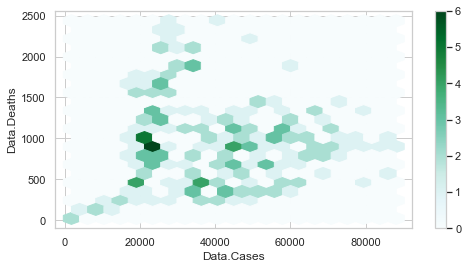

In [724]:
df6=df3.loc[(df3['Data.Cases'] >500) & (df3['Data.Deaths'] >20) & (df3['Data.Cases'] <90000) & (df3['Data.Deaths'] <2500)]
ax = df6.plot.hexbin(x='Data.Cases', y='Data.Deaths',
                         gridsize=20, sharex=False, figsize=(8, 4))

Practice pivot table

In [644]:
df=pd.read_csv('covid.csv')
df7=df.loc[df['Date.Year']==2020]
crosstab = df7.pivot_table(values = 'Data.Cases', index='Location.Country', columns='Date.Month', 
                                aggfunc='sum', margins=True)
crosstab

Date.Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Location.Country,,,,,,,,,,,,,
Afghanistan,0.0,1.0,140.0,1808.0,12576.0,16713.0,5304.0,1620.0,1092.0,2171.0,4419.0,3429.0,49273
Albania,NaN,NaN,223.0,543.0,356.0,1344.0,2731.0,4183.0,4138.0,7116.0,1666.0,NaN,22300
Algeria,0.0,1.0,583.0,3264.0,5419.0,4304.0,16260.0,14315.0,7222.0,6283.0,1876.0,NaN,59527
Andorra,NaN,NaN,370.0,373.0,21.0,91.0,67.0,202.0,842.0,2699.0,380.0,NaN,5045
Angola,NaN,NaN,7.0,20.0,57.0,192.0,802.0,1546.0,2281.0,5364.0,1308.0,NaN,11577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western_Sahara,NaN,NaN,NaN,6.0,17.0,185.0,558.0,0.0,0.0,0.0,0.0,NaN,766
Yemen,NaN,NaN,NaN,6.0,304.0,818.0,598.0,227.0,82.0,28.0,4.0,NaN,2067
Zambia,NaN,NaN,35.0,62.0,960.0,511.0,3987.0,6470.0,2690.0,1700.0,283.0,NaN,16698


In [646]:
df7 = crosstab.copy().loc['Afghanistan':'Zimbabwe',:]
df7.iloc[:,0:11] = df7.iloc[:,0:11].div(df7['All'], axis=0)
df7['All'] = df7['All'] / sum(df7['All'])
perc_crosstab = df7
print(perc_crosstab)

Date.Month           1         2         3         4         5         6  \
Location.Country                                                           
Afghanistan        0.0  0.000020  0.002841  0.036694  0.255231  0.339192   
Albania            NaN       NaN  0.010000  0.024350  0.015964  0.060269   
Algeria            0.0  0.000017  0.009794  0.054832  0.091034  0.072303   
Andorra            NaN       NaN  0.073340  0.073935  0.004163  0.018038   
Angola             NaN       NaN  0.000605  0.001728  0.004924  0.016585   
...                ...       ...       ...       ...       ...       ...   
Wallis_and_Futuna  NaN       NaN       NaN       NaN       NaN       NaN   
Western_Sahara     NaN       NaN       NaN  0.007833  0.022193  0.241514   
Yemen              NaN       NaN       NaN  0.002903  0.147073  0.395743   
Zambia             NaN       NaN  0.002096  0.003713  0.057492  0.030602   
Zimbabwe           NaN       NaN  0.000831  0.003204  0.016613  0.047466   

Date.Month 

**BONUS POINT : COL1 & COL3 with COL2 boxplot and seaborn plot**

COL1 V.S COL22 boxplot

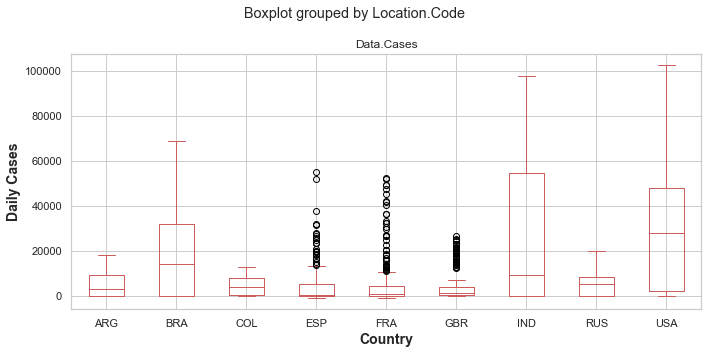

In [731]:
ax = df9.boxplot(by='Location.Code', column='Data.Cases',
                           figsize=(10, 5),color='indianred')
ax.set_xlabel('Country',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Cases',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

**COL1 V.S COL22 seaborn boxplot**

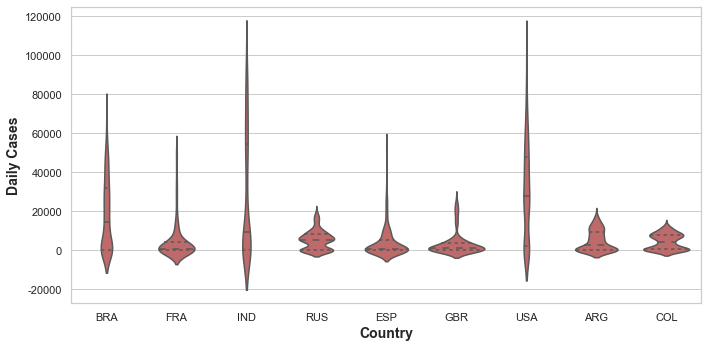

In [732]:
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.violinplot(data=df9, x="Location.Code", y="Data.Cases", ax=ax, inner='quartile', color='indianred')
ax.set_xlabel('Country',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Cases',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

**COL3 V.S COL22 seaborn boxplot**

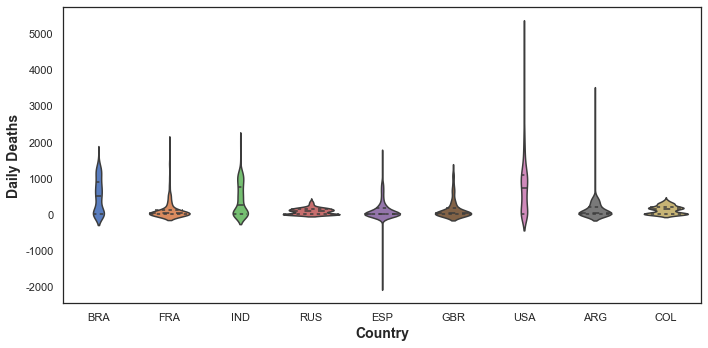

In [756]:
import seaborn as sns
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.violinplot(data=df9, x="Location.Code", y="Data.Deaths", ax=ax, inner='quartile', color='forestgreen',palette="muted")
ax.set_xlabel('Country',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Deaths',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

At first, I use **COL21: month** to do boxplot

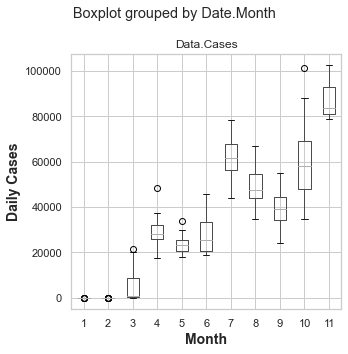

In [734]:
df11=df3.drop(65)
df10=df11.copy()
df11['Date.Month']=df10['Date.Month'].astype(int)
ax = df11.boxplot(by='Date.Month', column='Data.Cases',
                           figsize=(5, 5))
ax.set_xlabel('Month',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Cases',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

In [643]:
df

Date.Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Location.Country,,,,,,,,,,,,,
Afghanistan,0.0,0.000020,0.002841,0.036694,0.255231,0.339192,0.107645,0.032878,0.022162,0.044061,0.089684,3429.0,1.022710e-03
Albania,NaN,NaN,0.010000,0.024350,0.015964,0.060269,0.122466,0.187578,0.185561,0.319103,0.074709,NaN,4.628585e-04
Algeria,0.0,0.000017,0.009794,0.054832,0.091034,0.072303,0.273153,0.240479,0.121323,0.105549,0.031515,NaN,1.235542e-03
Andorra,NaN,NaN,0.073340,0.073935,0.004163,0.018038,0.013280,0.040040,0.166898,0.534985,0.075322,NaN,1.047139e-04
Angola,NaN,NaN,0.000605,0.001728,0.004924,0.016585,0.069275,0.133541,0.197029,0.463332,0.112983,NaN,2.402920e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis_and_Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,2.075599e-08
Western_Sahara,NaN,NaN,NaN,0.007833,0.022193,0.241514,0.728460,0.000000,0.000000,0.000000,0.000000,NaN,1.589908e-05
Yemen,NaN,NaN,NaN,0.002903,0.147073,0.395743,0.289308,0.109821,0.039671,0.013546,0.001935,NaN,4.290262e-05


**But unfortunately, COL22= month can not picture out the seaborn curve.**

I have tried many ways, including transfer month from int to str, but it can not work. So I need more time to learn ?

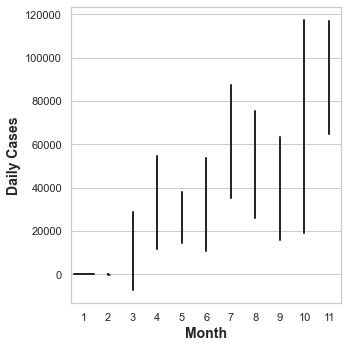

In [735]:
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
ax=sns.violinplot(data=df11, x="Date.Month", y="Data.Cases",ax=ax, inner='quartile', color='green')
ax.set_xlabel('Month',fontsize=14,fontweight='bold')
ax.set_ylabel('Daily Cases',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

# Wait to learn list:
    
* **Learn how to draw an arrow in a chart**
* **Learn how to draw trendline/trendline equation/Pearson R2 in a scatter plot**
* **Why seaborn boxplot can not columned by number?**